# Pymaceuticals Inc.
---

### Analysis
The sex Distribution of Mice seems fairly equal with males at 50.6 %, and females at 46.4% suggesting equal representation in the study. However, I did notice slight fluctuations in the data, suggesting that male mice might respond slightly better to Capomulin, while female mice might respond slightly better to Ramicane as indicated by the the lower mean and median tumor volumes.

Most effective treatment: 
After viewing the summary statistics, I gathered that Ramicane appears to be the most effective treatment.

However, there are outliers in Capomulin and Ramicane that may be bringing the avg mean, median, variance, standard deviation, and SEM down causing the treatment to appear more effective. Contrarily, there are also outliers in Infubinol and Ceftamin that may be increasing the mean, median, variance, standard deviation, and SEM the treatment to appear less effective.

The correlation coefficient between mouse weight and average tumor volume when utilizing Capomulin is positive, indicating that heavier mice tend to have larger tumor volumes on average. This means that  weightcouldy influene the growth ofg tumos.

Viewing the data from our line chart, Capomulin appears to be highly effective and tumor volume significantly drops around the 25 Time Point period..

In [1]:
# Dependencies
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read data
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# merge data 
merged_data = pd.merge(mouse_metadata, study_results, on='Mouse ID')

# Reorder columns
new_order = ['Mouse ID', 'Timepoint', 'Tumor Volume (mm3)', 'Metastatic Sites', 
                 'Drug Regimen', 'Sex', 'Age_months', 'Weight (g)']
merged_data = merged_data[new_order]

#visualize
pd.set_option('display.max_rows', 20)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', 200)
pd.set_option('display.colheader_justify', 'center')

# Reset index
merged_data.reset_index(drop=True, inplace=True)

styled_data = merged_data.style.set_properties(**{
    'text-align': 'center',
    'border': '1px solid black',
    'padding': '5px'
})

# Display the styled DataFrame
styled_data

In [2]:
# number of mice.
mouse_ids = merged_data['Mouse ID'].nunique()
print(f"Mouse IDs: {mouse_ids}")

Mouse IDs: 249


In [3]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Check for duplicates
duplicate_ids = merged_data[merged_data.duplicated(['Mouse ID', 'Timepoint'], keep=False)]['Mouse ID'].unique()

In [4]:
# Display data
duplicate_rows = merged_data[merged_data['Mouse ID'].isin(duplicate_ids)]
if not duplicate_rows.empty:
    print("Data associated with duplicate Mouse IDs and Timepoints:")
else:
    print("No duplicate Mouse IDs with the same Timepoint found.")

#duplicate time points
duplicate_mouse_ids = duplicate_rows['Mouse ID'].unique()

styled_data2 = duplicate_rows.style.set_properties(**{
    'text-align': 'center',
    'border': '1px solid black',
    'padding': '5px'
})

# Display
styled_data2

Data associated with duplicate Mouse IDs and Timepoints:


In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
cleaned_data = merged_data[~merged_data['Mouse ID'].isin(duplicate_mouse_ids)]

unique_mouse_ids_cleaned = cleaned_data['Mouse ID'].nunique()
print(f"Number of unique Mouse IDs after cleaning: {unique_mouse_ids_cleaned}")


# Display the cleaned DataFrame
styled_cleaned_data = cleaned_data.style.set_properties(**{
    'text-align': 'center',
    'border': '1px solid black',
    'padding': '5px'
})

# Display the cleaned styled DataFrame
styled_cleaned_data

Number of unique Mouse IDs after cleaning: 248


In [6]:
# Checking the number of mice in the clean DataFrame.
# number of mice.
mouse_ids = cleaned_data['Mouse ID'].nunique()
print(f"Mouse IDs: {mouse_ids}")

Mouse IDs: 248


## Summary Statistics

In [7]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary DataFrame.

# Group by 'Drug Regimen' and calculate the required summary statistics for 'Tumor Volume (mm3)'
summary_stats = cleaned_data.groupby('Drug Regimen')['Tumor Volume (mm3)'].agg(
    mean='mean',
    median='median',
    variance='var',
    std_dev='std',
    sem='sem'
).reset_index()

# Set 'Drug Regimen' as the index
summary_stats.set_index('Drug Regimen', inplace=True)

# Style the summary statistics DataFrame
styled_summary_stats = summary_stats.style.set_properties(**{
    'text-align': 'center',
    'border': '1px solid black',
    'padding': '5px'
}).set_caption("Drug Regimen | Tumor Volume")

# Display the styled DataFrame
styled_summary_stats

In [8]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation, SEM
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single line
summary_stats = cleaned_data.groupby('Drug Regimen')['Tumor Volume (mm3)'].agg(['mean', 'median', 'var', 'std', 'sem'])
summary_stats

mean      median       var        std       sem  
Drug Regimen                                                     
Capomulin     40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin      52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol     52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril      55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol      54.331565  52.509285  66.173479  8.134708  0.596466
Placebo       54.033581  52.288934  61.168083  7.821003  0.581331
Propriva      52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane      40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn      54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol     53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

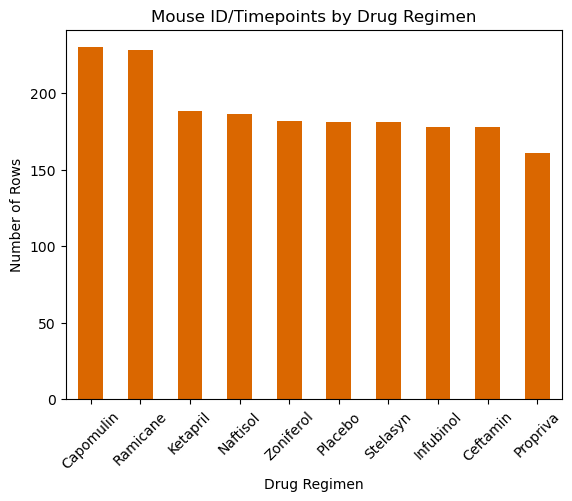

In [9]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
# Count | drug regimen
drug_regimen_counts = merged_data['Drug Regimen'].value_counts().reset_index()
drug_regimen_counts.columns = ['Drug Regimen', 'Count']


#results
ax = drug_regimen_counts.plot(kind='bar', x='Drug Regimen', y='Count', legend=False, color='#da6700', title='Mouse ID/Timepoints by Drug Regimen')
ax.set_xlabel('Drug Regimen')
ax.set_ylabel('Number of Rows')
ax.set_xticklabels(drug_regimen_counts['Drug Regimen'], rotation=45)  # improved readability 

plt.show()

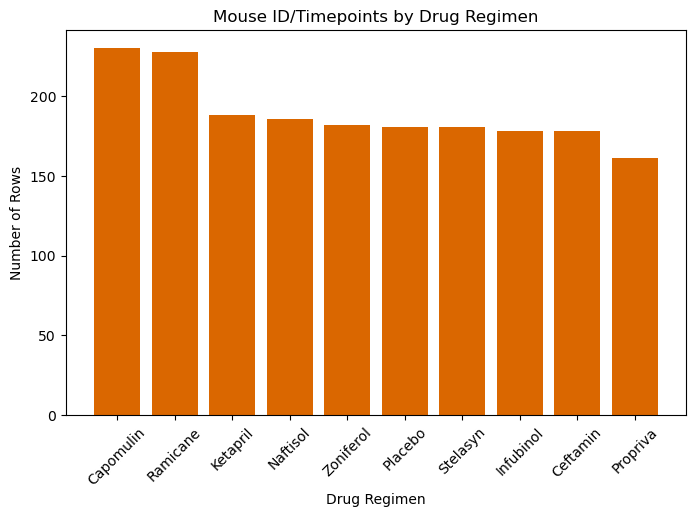

In [10]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
plt.figure(figsize=(8, 5))
plt.bar(drug_regimen_counts['Drug Regimen'], drug_regimen_counts['Count'], color='#da6700')
plt.title('Mouse ID/Timepoints by Drug Regimen')
plt.xlabel('Drug Regimen')
plt.ylabel('Number of Rows')
plt.xticks(rotation=45)  # improved readability 

plt.show()

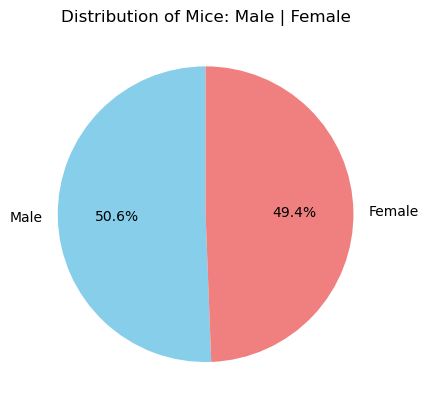

In [11]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas

# Count each sex
sex_counts = merged_data['Sex'].value_counts()

# Plot the pie chart
ax = sex_counts.plot.pie(
    autopct='%1.1f%%',  # Display percentages
    startangle=90,      # Start at 90 degrees
    colors=['skyblue', 'lightcoral'],  # Colors
    title='Distribution of Mice: Male | Female'
)
ax.set_ylabel('')  # Remove the y-label for better aesthetics

plt.show()

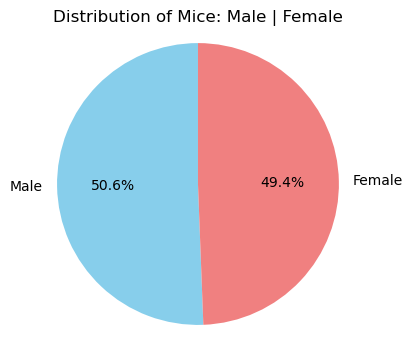

In [12]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
# Count each sex
sex_counts = merged_data['Sex'].value_counts()

# Plot pie chart
plt.figure(figsize=(4, 4))
plt.pie(
    sex_counts, 
    labels=sex_counts.index, 
    autopct='%1.1f%%',  # Display percentages
    startangle=90,      # Start at 90 degrees
    colors=['skyblue', 'lightcoral']  # Colors
)
plt.title('Distribution of Mice: Male | Female')
plt.axis('equal')  # Equal aspect ratio
plt.show()

## Quartiles, Outliers and Boxplots

In [13]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Get the last (greatest) timepoint for each mouse
last_timepoint = merged_data.groupby('Mouse ID')['Timepoint'].max().reset_index()

# Merge with original
final_tumor_volume_data = pd.merge(last_timepoint, merged_data, on=['Mouse ID', 'Timepoint'])

In [14]:
# Put treatments into a list for for loop (and later for plot labels)

# Create empty list to fill with tumor vol data (for plotting)
treatments = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']
tumor_volumes = []

# Loop through each treatment | collect final tumor volume
for treatment in treatments:
    treatment_data = final_tumor_volume_data[final_tumor_volume_data['Drug Regimen'] == treatment]['Tumor Volume (mm3)']
    tumor_volumes.append(treatment_data)

# list
summary_stats = []


# Determine outliers using upper and lower bounds
# quartiles | IQR | outliers 
for i in range(len(treatments)):
    treatment = treatments[i]
    volumes = tumor_volumes[i]
    
    quartiles = volumes.quantile([.25, .5, .75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq - lowerq
    
    lower_bound = lowerq - (1.5 * iqr)
    upper_bound = upperq + (1.5 * iqr)
    
    outliers = volumes[(volumes < lower_bound) | (volumes > upper_bound)]
    
    summary_stats.append({
        'Treatment': treatment,
        'Lower Quartile': lowerq,
        'Upper Quartile': upperq,
        'IQR': iqr,
        'Lower Bound': lower_bound,
        'Upper Bound': upper_bound,
        'Outliers': ', '.join(map(str, outliers.values))
    })

summary_df = pd.DataFrame(summary_stats)

# Style 
styled_summary_df = summary_df.style.set_properties(**{
    'text-align': 'center',
    'border': '1px solid black',
    'padding': '5px'
}).set_caption("Tumor Volumes by Treatment")

#outliers
styled_summary_df = styled_summary_df.set_table_styles({
    'Outliers': [{'selector': '', 'props': [('color', '#da6700')]}],
    'caption': [{'selector': 'caption', 'props': [('caption-side', 'top'), ('text-align', 'center'), ('font-size', '16px'), ('font-weight', 'bold')]}]
}, overwrite=False)

# Display the styled DataFrame
styled_summary_df

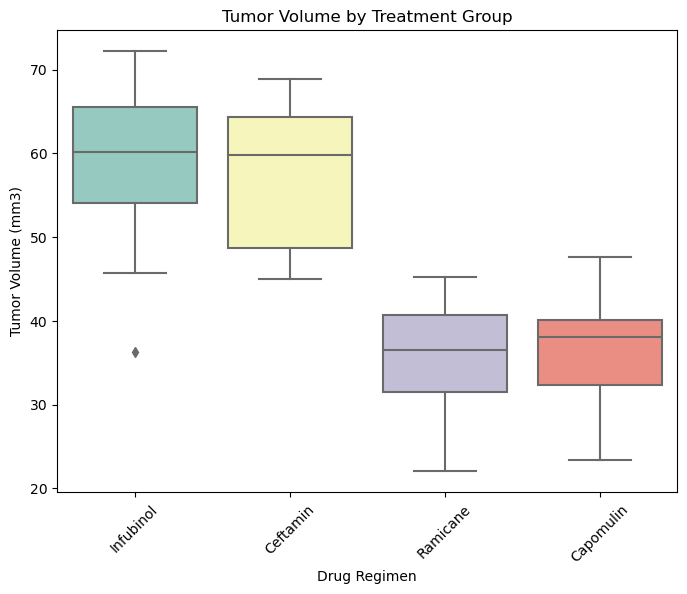

In [15]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.

# match the og photo order 
treatments = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']

# Filter data by treatments
filtered_data = final_tumor_volume_data[final_tumor_volume_data['Drug Regimen'].isin(treatments)]


#import seaborn for cleaner visualation 
import seaborn as sns

#plot box 
plt.figure(figsize=(8, 6))
sns.boxplot(x='Drug Regimen', y='Tumor Volume (mm3)', data=filtered_data, palette='Set3')

# Add title and labels
plt.title('Tumor Volume by Treatment Group')
plt.xlabel('Drug Regimen')
plt.ylabel('Tumor Volume (mm3)')
plt.xticks(rotation=45)  #improved readability

# Show the plot
plt.show()

## Line and Scatter Plots

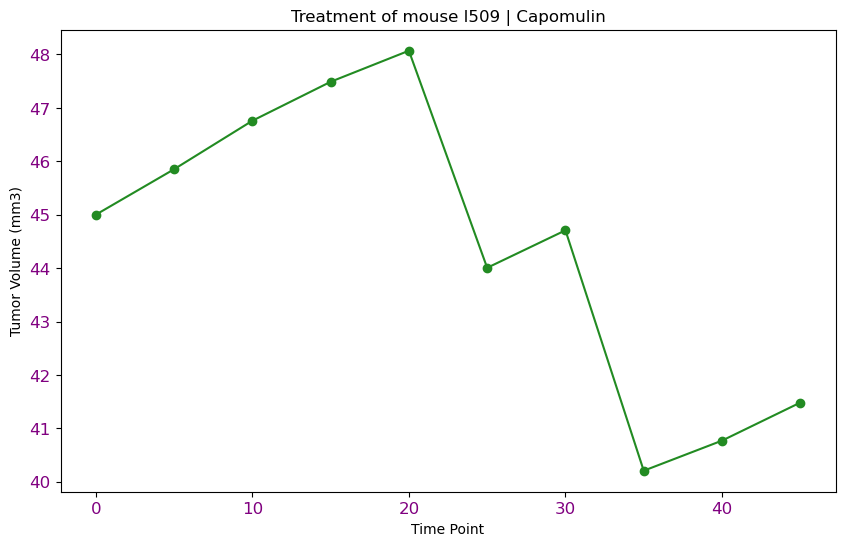

In [16]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
# Filter data by Capomulin
one_mouse = merged_data[(merged_data['Drug Regimen'] == 'Capomulin') & (merged_data['Mouse ID'] == 'l509')]

#line plot
plt.figure(figsize=(10, 6))
plt.plot(one_mouse['Timepoint'], one_mouse['Tumor Volume (mm3)'], marker='o', linestyle='-', color='forestgreen')

#title and labels
plt.title('Treatment of mouse l509 | Capomulin')
plt.xlabel('Time Point')
plt.ylabel('Tumor Volume (mm3)')
plt.xticks(fontsize=12, color='purple')
plt.yticks(fontsize=12, color='purple')

# Show the plot
plt.show()

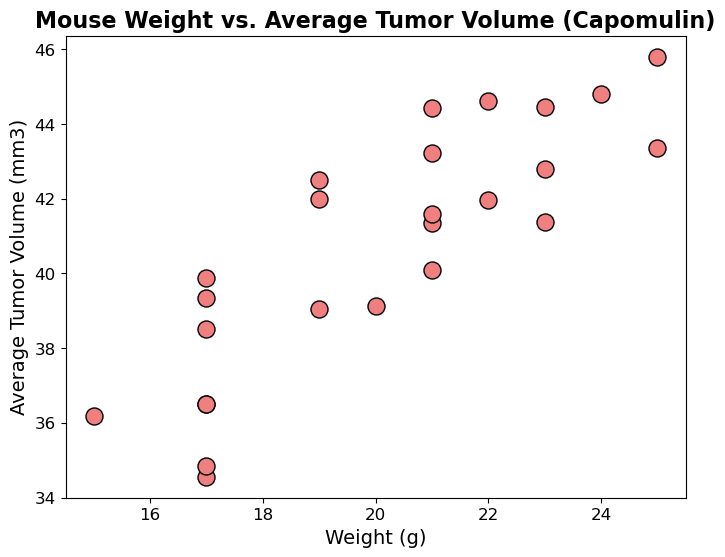

In [17]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen

# Filter by Capomulin 
capomulin_data = merged_data[merged_data['Drug Regimen'] == 'Capomulin']

# avg tumor volume
avg_tumor = capomulin_data.groupby('Mouse ID')['Tumor Volume (mm3)'].mean().reset_index()

# Merge avg tumor with mouse
capomulin_final = pd.merge(mouse_metadata, avg_tumor, on='Mouse ID')

#scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(capomulin_final['Weight (g)'], capomulin_final['Tumor Volume (mm3)'], color='lightcoral', edgecolor='black', s=150)

#title and labels
plt.title('Mouse Weight vs. Average Tumor Volume (Capomulin)', fontsize=16, fontweight='bold')
plt.xlabel('Weight (g)', fontsize=14)
plt.ylabel('Average Tumor Volume (mm3)', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Show the plot
plt.show()

## Correlation and Regression

Correlation coefficient: 0.8419363424694724


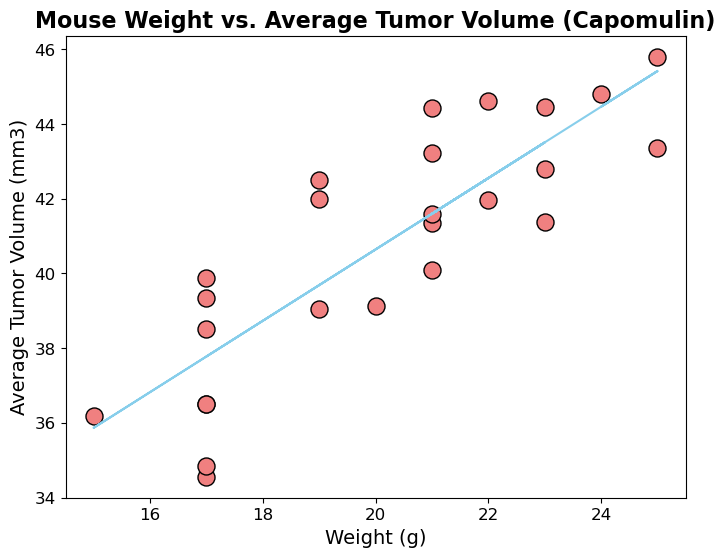

In [18]:
# Calculate the correlation coefficient and a linear regression model 
# for mouse weight and average observed tumor volume for the entire Capomulin regimen

from scipy.stats import linregress

#Capomulin already filtered above with capomulin_data = merged_data[merged_data['Drug Regimen'] == 'Capomulin']

#avg_tumor already calculated: avg_tumor = capomulin_data.groupby('Mouse ID')['Tumor Volume (mm3)'].mean().reset_index()

#data already merged: capomulin_final = pd.merge(mouse_metadata, avg_tumor, on='Mouse ID')

#correlation coefficient
correlation = capomulin_final['Weight (g)'].corr(capomulin_final['Tumor Volume (mm3)'])
print(f"Correlation coefficient: {correlation}")


#linear regression
slope, intercept, r_value, p_value, std_err = linregress(capomulin_final['Weight (g)'], capomulin_final['Tumor Volume (mm3)'])

#scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(capomulin_final['Weight (g)'], capomulin_final['Tumor Volume (mm3)'], 
            color='lightcoral', edgecolor='black', s=150)


#linear regression line
regression_line = slope * capomulin_final['Weight (g)'] + intercept
plt.plot(capomulin_final['Weight (g)'], regression_line, color='skyblue')

# Add title and labels
plt.title('Mouse Weight vs. Average Tumor Volume (Capomulin)', fontsize=16, fontweight='bold')
plt.xlabel('Weight (g)', fontsize=14)
plt.ylabel('Average Tumor Volume (mm3)', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Show the plot
plt.show()